# Генерация дополнительных строковых фичей. Практика

## Цели практической работы
1. Потренироваться генерировать дополнительные признаки с помощью lambda-функций.
2. Потренироваться генерировать дополнительные строковые признаки.
3. Подготовить датасет к этапу моделирования. 

## Что входит в практическую работу
1. Загрузить датасет и ознакомиться с ним.
2. Сгенерировать дополнительные признаки для этапа моделирования, используя lambda-функции и функции над строками.

## Задача

Мы продолжим исследовать и готовить данные для этапа моделирования.

Вам предстоит работать с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах, представленной в файле `data/vehicles_dataset_upd.csv`. На этих данных вы построите первую модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.

В этой практической работе вы начнете генерировать дополнительные признаки.


## Описание датасета:
- `id`: идентификатор записи;
- `url`: URL-записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.


In [48]:
# Импортируйте необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt

### Задача 1. Изменение шкалы признака

1. Загрузите датасет из `data/vehicles_dataset_upd4.csv`, выведите первые пять записей и список колонок.


In [78]:
# Ваш код здесь
df = pd.read_csv('data/vehicles_dataset_upd4.csv')
df

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,posting_date,price_category,date,odometer_km,odometer/price,region_new,region_corrected,manufacturer_model,desc_len,model_in_desc
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00,44163.618048,0.499036,chattanooga,chattanooga,ram: 2500 crew cab big horn,4482,0
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00,96597.654912,3.542852,newjersey,northjersey,ford: explorer 4wd 4dr xlt,968,0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00,22608.064512,0.394718,reno,reno,volkswagen: golf r hatchback,4286,0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00,188761.567104,8.089034,fayetteville,fayetteville,toyota: rav4,3241,0
4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,2021-04-08T15:10:56-0400,medium,2021-04-08 19:10:56+00:00,129495.864960,5.515079,knoxville,knoxville,bmw: 1 series 128i coupe 2d,4851,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9614,7304876387,https://chautauqua.craigslist.org/ctd/d/falcon...,chautauqua,https://chautauqua.craigslist.org,4495,2002,toyota,rav4,gas,150000,...,2021-04-10T16:33:57-0400,low,2021-04-10 20:33:57+00:00,241401.600000,33.370412,chautauqua,chautauqua,toyota: rav4,1710,0
9615,7316152972,https://binghamton.craigslist.org/ctd/d/roches...,binghamton,https://binghamton.craigslist.org,14495,2008,jeep,wrangler,gas,113573,...,2021-05-03T09:36:30-0400,medium,2021-05-03 13:36:30+00:00,182778.026112,7.835323,binghamton,binghamton,jeep: wrangler,948,0
9616,7310993818,https://salem.craigslist.org/ctd/d/salem-2011-...,salem,https://salem.craigslist.org,8995,2011,audi,a3 2.0t premium plus pzev,gas,150184,...,2021-04-22T12:14:01-0700,low,2021-04-22 19:14:01+00:00,241697.719296,16.696387,salem,salem,audi: a3 2.0t premium plus pzev,909,0
9617,7306637427,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,31900,2015,porsche,cayenne,hybrid,61943,...,2021-04-14T09:14:42-0500,high,2021-04-14 14:14:42+00:00,99687.595392,1.941787,madison,madison,porsche: cayenne,3644,0


In [174]:
df.columns#выводим список колонок

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer', 'title_status', 'transmission',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
       'price_category', 'date', 'odometer_km', 'odometer/price', 'region_new',
       'region_corrected', 'manufacturer_model', 'desc_len', 'model_in_desc',
       'price_k$', 'age_category', 'model_len', 'model_word_count', 'is_audi',
       'is_ford', 'is_chevrolet', 'is_toyota', 'is_jeep', 'is_honda',
       'is_nissan'],
      dtype='object')

2. С помощью lambda-функции или без неё создайте признак `price_k$`, обозначающий стоимость автомобиля в тысячах долларов. Округлите и выведите получившиеся значения.

In [79]:
# Ваш код здесь
df['price_k$'] = df.apply(lambda x: round(x.price / 1000, 1), axis=1)
df['price_k$']

0       55.0
1       16.9
2       35.6
3       14.5
4       14.6
        ... 
9614     4.5
9615    14.5
9616     9.0
9617    31.9
9618    32.0
Name: price_k$, Length: 9619, dtype: float64

In [80]:
df['price_k$'] =  round(df['price'] / 1000, 1) 
df['price_k$']

0       55.0
1       16.9
2       35.6
3       14.5
4       14.6
        ... 
9614     4.5
9615    14.5
9616     9.0
9617    31.9
9618    32.0
Name: price_k$, Length: 9619, dtype: float64

In [ ]:
df['price_k$'] = round(df.price / 1000)
df['price_k$']

3. Посчитайте коэффициент корреляции Пирсона для стоимости автомобиля в долларах и в округлённых тысячах долларов и подумайте, почему получилось такое значение.

In [81]:
# Ваш код здесь
df['price'].corr(df['price_k$'])

0.9999992871258238

### Задача 2. Построение категориального признака на основе количественного

1. Выведите описательные статистики для переменной `year`.

In [82]:
# Ваш код здесь
df.year.describe() # вариант df['year'].describe()

count    9619.000000
mean     2011.555879
std         6.385814
min      1995.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2020.000000
Name: year, dtype: float64

2. Создайте с помощью lambda-функции новый признак `age_category`, обозначающий возрастную категорию автомобиля, выведите его.

Будет три категории:
- `new` — автомобиль младше 2013 года выпуска;
- `average`— автомобиль, выпущенный между 2006 и 2013 годом;
- `old` — автомобиль до 2006 года выпуска.

In [120]:
#это послужило вдохновыением
df_exemple = pd.DataFrame({'team': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
 'points': [18, 22, 19, 14, 14, 11, 20, 28],
 'assists': [5, 7, 7, 9, 12, 9, 9, 4]})
df_exemple['status'] = df_exemple['points'].apply ( lambda x: ' Bad ' if x < 20 else ' Good')

#view updated DataFrame
print(df_exemple)


  team  points  assists status
0    A      18        5   Bad 
1    B      22        7   Good
2    C      19        7   Bad 
3    D      14        9   Bad 
4    E      14       12   Bad 
5    F      11        9   Bad 
6    G      20        9   Good
7    H      28        4   Good


In [118]:
# Ваш код здесь
a = 'new'
b = 'avarage'
df['age_category'] = ''
df['age_category'] = df['year'].apply(lambda x: 'old' if x < 2006 
                                      else ('avarage' if x >= 2006 and x <= 2013 else 'new'))
df['age_category'].describe()                                      

count     9619
unique       3
top        new
freq      4486
Name: age_category, dtype: object

In [176]:
df['age_category'] =  df.apply(lambda x: "new" if x.year > 2013 
                               else ("old" if x.year < 2006 else "average"), axis=1)
df['age_category'].describe() 

count     9619
unique       3
top        new
freq      4486
Name: age_category, dtype: object

3. Выведите значения года выпуска автомобиля и получившуюся возрастную категорию автомобиля, чтобы убедиться в правильности распределения категорий.

In [116]:
# Ваш код здесь
df[['year', 'age_category']]

,year,age_category
0,2020,new
1,2016,new
2,2017,new
3,2013,avarage
4,2012,avarage
...,...,...
9614,2002,old
9615,2008,avarage
9616,2011,avarage
9617,2015,new


1. На одном полотне постройте графики распределения года производства автомобиля для каждой из возрастной категории автомобиля. Настройти общий размер фигуры — 12x8, цвета в зависимости от возрастной категории: зелёный, оранжевый и красный для новых, средних и старых автомобилей соответственно. Не забудьте подписать название графика и оси, а также вывести легенду для возрастной категории. 


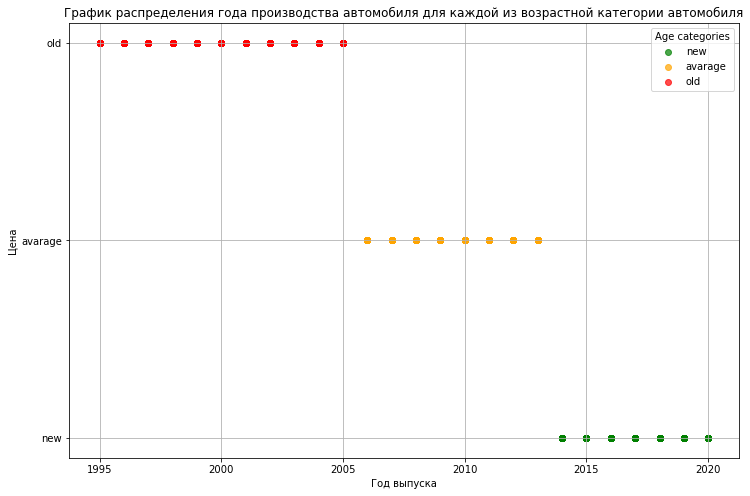

In [156]:
# Ваш код здесь
colors = {'new': 'green', 'avarage': 'orange', 'old': 'red'}
fig, ax = plt.subplots(figsize=(12, 8))
for age_category in colors:
    color = colors[age_category]
    data = df[df['age_category'] == age_category]

    ax.scatter(data['year'], data['age_category'], c=color, label=age_category, alpha=0.7)

ax.legend(loc='upper right', title="Age categories")
plt.title("График распределения года производства автомобиля для каждой из возрастной категории автомобиля")
plt.xlabel('Год выпуска')
plt.ylabel('Цена')
plt.grid(True)
plt.show()



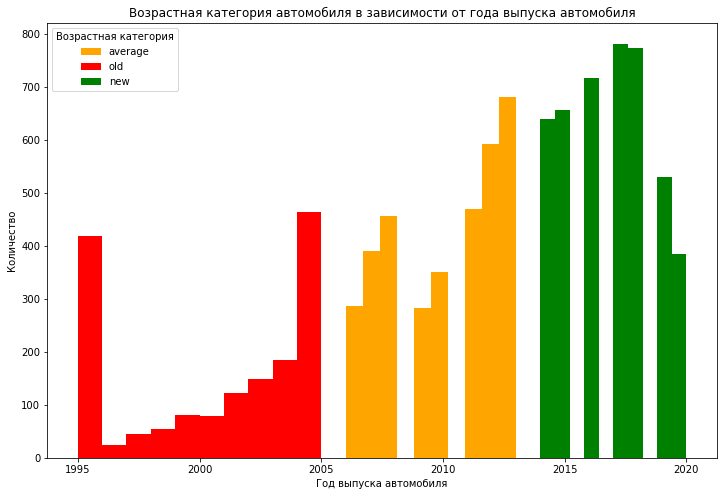

In [177]:
colors = {'average': 'orange', 'old': 'red', 'new': 'green'}

fig, ax = plt.subplots(figsize=(12, 8))
for age_category in colors:
    color = colors[age_category]
    data = df[df['age_category'] == age_category]

    ax.hist(data['year'], color=color)
    
plt.ylabel('Количество')
plt.xlabel('Год выпуска автомобиля')
plt.title('Возрастная категория автомобиля в зависимости от года выпуска автомобиля')
plt.legend(colors, title="Возрастная категория");

### Задача 3. Построение признаков из строк 

1. Создайте новый признак `model_len`, обозначающий количество символов (длину строки) в модели автомобиля, выведите его.

In [159]:
# Ваш код здесь
df['model_len'] = df.apply(lambda x: len(x.model), axis=1)
df[['model_len', 'model']]


,model_len,model
0,22,2500 crew cab big horn
1,20,explorer 4wd 4dr xlt
2,16,golf r hatchback
3,4,rav4
4,22,1 series 128i coupe 2d
...,...,...
9614,4,rav4
9615,8,wrangler
9616,25,a3 2.0t premium plus pzev
9617,7,cayenne


2. С помощью `value_counts` посмотрите на самое популярное количество символов в модели автомобиля.

In [161]:
# Ваш код здесь
df['model_len'].value_counts()

6      1004
5       900
7       724
8       681
4       647
       ... 
187       1
168       1
58        1
76        1
186       1
Name: model_len, Length: 65, dtype: int64


3. Создайте новый признак `model_word_count`, обозначающий количество слов в модели автомобиля, выведите его.

In [164]:
# Ваш код здесь
df['model_word_count'] = df.apply(lambda x: len(x.model.split()), axis=1) 
df[['model_word_count', 'model']]
#df['model_word_count'] = df.apply(lambda x: len(x.model.split(' ')), axis=1)

,model_word_count,model
0,5,2500 crew cab big horn
1,4,explorer 4wd 4dr xlt
2,3,golf r hatchback
3,1,rav4
4,5,1 series 128i coupe 2d
...,...,...
9614,1,rav4
9615,1,wrangler
9616,5,a3 2.0t premium plus pzev
9617,1,cayenne


4. С помощью `value_counts` посмотрите на самое популярное количество слов в модели автомобиля.

In [165]:
# Ваш код здесь
df['model_word_count'].value_counts()

1     4289
2     2184
3     1355
4     1182
5      499
6       67
10       8
8        7
11       5
9        5
7        4
13       3
15       3
27       1
21       1
14       1
17       1
24       1
12       1
29       1
22       1
Name: model_word_count, dtype: int64

### Задача 4. Создание нескольких признаков из категориальной переменной

1. Для каждого выбранного производителя автомобиля создайте отдельный признак, содержащий 1, если данный автомобиль произведён именно этим производителем, и 0, если нет. Назовите признаки согласно шаблону: для `audi` это будет `is_audi` и так далее.

In [166]:
# Допишите код

manufacturer_names = ['audi', 'ford', 'chevrolet', 'toyota', 'jeep', 'honda', 'nissan']

for manufacturer in manufacturer_names:
    # Ваш код здесь
    col_name = 'is_' + manufacturer

    df[col_name] = df.apply(lambda x: 1 if x.manufacturer == manufacturer else 0, axis=1)

2. Выведите 7 последних колонок, чтобы убедиться в правильности вывода.

In [170]:
# Ваш код здесь
df.tail(7) 
#df.iloc[:, -7:]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,age_category,model_len,model_word_count,is_audi,is_ford,is_chevrolet,is_toyota,is_jeep,is_honda,is_nissan
9612,7315504125,https://appleton.craigslist.org/ctd/d/fond-du-...,appleton-oshkosh-FDL,https://appleton.craigslist.org,8999,2013,dodge,grand caravan,gas,114730,...,avarage,13,2,0,0,0,0,0,0,0
9613,7305898015,https://fayar.craigslist.org/ctd/d/lowell-2015...,fayetteville,https://fayar.craigslist.org,22900,2015,ram,1500,diesel,151942,...,new,4,1,0,0,0,0,0,0,0
9614,7304876387,https://chautauqua.craigslist.org/ctd/d/falcon...,chautauqua,https://chautauqua.craigslist.org,4495,2002,toyota,rav4,gas,150000,...,old,4,1,0,0,0,1,0,0,0
9615,7316152972,https://binghamton.craigslist.org/ctd/d/roches...,binghamton,https://binghamton.craigslist.org,14495,2008,jeep,wrangler,gas,113573,...,avarage,8,1,0,0,0,0,1,0,0
9616,7310993818,https://salem.craigslist.org/ctd/d/salem-2011-...,salem,https://salem.craigslist.org,8995,2011,audi,a3 2.0t premium plus pzev,gas,150184,...,avarage,25,5,1,0,0,0,0,0,0
9617,7306637427,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,31900,2015,porsche,cayenne,hybrid,61943,...,new,7,1,0,0,0,0,0,0,0
9618,7311960763,https://norfolk.craigslist.org/ctd/d/chesapeak...,norfolk / hampton roads,https://norfolk.craigslist.org,31990,2017,ram,1500 crew cab big horn,gas,35921,...,new,22,5,0,0,0,0,0,0,0


3. Выведите только те автомобили, которые произведены audi. Сделайте это на основе нового признака `is_audi`.

In [182]:
# Ваш код здесь
df[df['is_audi']==1]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,age_category,model_len,model_word_count,is_audi,is_ford,is_chevrolet,is_toyota,is_jeep,is_honda,is_nissan
58,7308399412,https://slo.craigslist.org/ctd/d/grover-beach-...,san luis obispo,https://slo.craigslist.org,9995,2010,audi,q5,gas,165714,...,average,2,1,1,0,0,0,0,0,0
104,7311352618,https://baltimore.craigslist.org/ctd/d/cockeys...,baltimore,https://baltimore.craigslist.org,33499,2018,audi,q7,gas,46529,...,new,2,1,1,0,0,0,0,0,0
125,7306308183,https://montgomery.craigslist.org/ctd/d/montgo...,montgomery,https://montgomery.craigslist.org,29590,2018,audi,q5 premium sport utility 4d,gas,34476,...,new,27,5,1,0,0,0,0,0,0
195,7315205542,https://denver.craigslist.org/ctd/d/littleton-...,denver,https://denver.craigslist.org,15598,2013,audi,a6,gas,81640,...,average,2,1,1,0,0,0,0,0,0
251,7302069239,https://indianapolis.craigslist.org/ctd/d/indi...,indianapolis,https://indianapolis.craigslist.org,38990,2018,audi,s5 premium plus sedan 4d,gas,40118,...,new,24,5,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9508,7313590324,https://reno.craigslist.org/cto/d/incline-vill...,reno / tahoe,https://reno.craigslist.org,28000,2014,audi,s6,gas,69000,...,new,2,1,1,0,0,0,0,0,0
9551,7316331812,https://indianapolis.craigslist.org/ctd/d/indi...,indianapolis,https://indianapolis.craigslist.org,10995,2011,audi,q7 premium plus,gas,140014,...,average,15,3,1,0,0,0,0,0,0
9559,7314775851,https://indianapolis.craigslist.org/cto/d/indi...,indianapolis,https://indianapolis.craigslist.org,13500,2012,audi,q5,gas,78000,...,average,2,1,1,0,0,0,0,0,0
9570,7316569161,https://chicago.craigslist.org/chc/cto/d/chica...,chicago,https://chicago.craigslist.org,8500,2009,audi,q7 3.6 premium quattro,gas,152000,...,average,22,4,1,0,0,0,0,0,0


|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

**Ответы для самостоятельной проверки**

### Задача 1.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 1

df = pd.read_csv('data/vehicles_dataset_upd4.csv')
df.head()


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,posting_date,price_category,date,odometer_km,odometer/price,region_new,region_corrected,manufacturer_model,desc_len,model_in_desc
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00,44163.618048,0.499036,chattanooga,chattanooga,ram: 2500 crew cab big horn,4482,0
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00,96597.654912,3.542852,newjersey,northjersey,ford: explorer 4wd 4dr xlt,968,0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00,22608.064512,0.394718,reno,reno,volkswagen: golf r hatchback,4286,0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00,188761.567104,8.089034,fayetteville,fayetteville,toyota: rav4,3241,0
4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,2021-04-08T15:10:56-0400,medium,2021-04-08 19:10:56+00:00,129495.864960,5.515079,knoxville,knoxville,bmw: 1 series 128i coupe 2d,4851,0


In [ ]:
# 1

df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer', 'title_status', 'transmission',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
       'price_category', 'date', 'odometer_km', 'odometer/price', 'region_new',
       'region_corrected', 'manufacturer_model', 'desc_len', 'model_in_desc'],
      dtype='object')

In [ ]:
# 2 v1

df['price_k$'] = round(df.price / 1000)
df['price_k$']

0       55.0
1       17.0
2       36.0
3       14.0
4       15.0
        ... 
9614     4.0
9615    14.0
9616     9.0
9617    32.0
9618    32.0
Name: price_k$, Length: 9619, dtype: float64

In [ ]:
# 2 v2

df['price_k$'] = df.apply(lambda x: round(x.price / 1000) , axis=1)
df['price_k$']

0       55
1       17
2       36
3       14
4       15
        ..
9614     4
9615    14
9616     9
9617    32
9618    32
Name: price_k$, Length: 9619, dtype: int64

In [ ]:
# 3

df['price'].corr(df['price_k$'])

0.9997987024374051

### Задача 2.

In [ ]:
# 1

df['year'].describe()

count    9619.000000
mean     2011.555879
std         6.385814
min      1995.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2020.000000
Name: year, dtype: float64

In [ ]:
# 2

df['age_category'] =  df.apply(lambda x: "new" if x.year > 2013 else ("old" if x.year < 2006 else "average"), axis=1)
df['age_category']

0           new
1           new
2           new
3       average
4       average
         ...   
9614        old
9615    average
9616    average
9617        new
9618        new
Name: age_category, Length: 9619, dtype: object

In [ ]:
# 3

df[['year', 'age_category']]

,year,age_category
0,2020,new
1,2016,new
2,2017,new
3,2013,average
4,2012,average
...,...,...
9614,2002,old
9615,2008,average
9616,2011,average
9617,2015,new


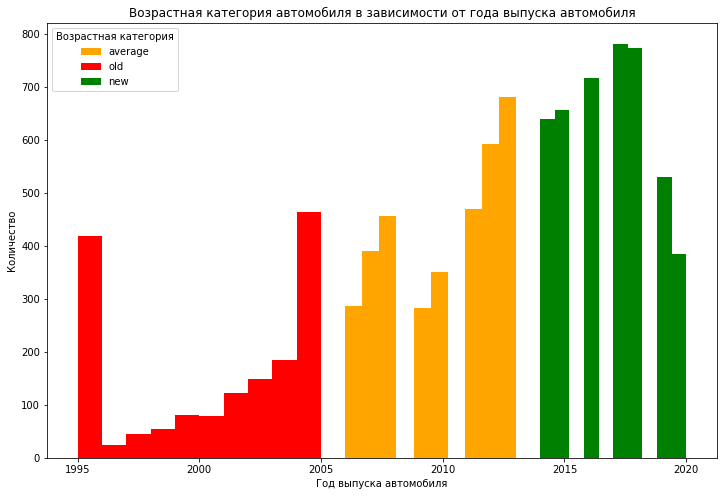

In [ ]:
# 4

colors = {'average': 'orange', 'old': 'red', 'new': 'green'}

fig, ax = plt.subplots(figsize=(12, 8))
for age_category in colors:
    color = colors[age_category]
    data = df[df['age_category'] == age_category]

    ax.hist(data['year'], color=color)
    
plt.ylabel('Количество')
plt.xlabel('Год выпуска автомобиля')
plt.title('Возрастная категория автомобиля в зависимости от года выпуска автомобиля')
plt.legend(colors, title="Возрастная категория");

### Задача 3.

In [ ]:
# 1

df['model_len'] = df.apply(lambda x: len(x.model) , axis=1)
df['model_len']

0       22
1       20
2       16
3        4
4       22
        ..
9614     4
9615     8
9616    25
9617     7
9618    22
Name: model_len, Length: 9619, dtype: int64

In [ ]:
# 2

df['model_len'].value_counts()

6      1004
5       900
7       724
8       681
4       647
       ... 
187       1
168       1
58        1
76        1
186       1
Name: model_len, Length: 65, dtype: int64

In [ ]:
# 3

df['model_word_count'] = df.apply(lambda x: len(x.model.split(' ')), axis=1)
df['model_word_count']

0       5
1       4
2       3
3       1
4       5
       ..
9614    1
9615    1
9616    5
9617    1
9618    5
Name: model_word_count, Length: 9619, dtype: int64

In [ ]:
# 4

df['model_word_count'].value_counts()

1     4289
2     2184
3     1355
4     1182
5      498
6       68
10       8
8        7
11       5
9        5
7        4
13       3
15       3
27       1
21       1
14       1
17       1
24       1
12       1
29       1
22       1
Name: model_word_count, dtype: int64

### Задача 4.

In [ ]:
# 1

manufacturer_names = ['audi', 'ford', 'chevrolet', 'toyota', 'jeep', 'honda', 'nissan']

for manufacturer in manufacturer_names:
    col_name = 'is_' + manufacturer

    df[col_name] = df.apply(lambda x: 1 if x.manufacturer == manufacturer else 0, axis=1)

In [ ]:
# 2

df.iloc[:, -7:]

,is_audi,is_ford,is_chevrolet,is_toyota,is_jeep,is_honda,is_nissan
0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
9614,0,0,0,1,0,0,0
9615,0,0,0,0,1,0,0
9616,1,0,0,0,0,0,0
9617,0,0,0,0,0,0,0


In [ ]:
# 3

df[df['is_audi'] == 1]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,age_category,model_len,model_word_count,is_audi,is_ford,is_chevrolet,is_toyota,is_jeep,is_honda,is_nissan
58,7308399412,https://slo.craigslist.org/ctd/d/grover-beach-...,san luis obispo,https://slo.craigslist.org,9995,2010,audi,q5,gas,165714,...,average,2,1,1,0,0,0,0,0,0
104,7311352618,https://baltimore.craigslist.org/ctd/d/cockeys...,baltimore,https://baltimore.craigslist.org,33499,2018,audi,q7,gas,46529,...,new,2,1,1,0,0,0,0,0,0
125,7306308183,https://montgomery.craigslist.org/ctd/d/montgo...,montgomery,https://montgomery.craigslist.org,29590,2018,audi,q5 premium sport utility 4d,gas,34476,...,new,27,5,1,0,0,0,0,0,0
195,7315205542,https://denver.craigslist.org/ctd/d/littleton-...,denver,https://denver.craigslist.org,15598,2013,audi,a6,gas,81640,...,average,2,1,1,0,0,0,0,0,0
251,7302069239,https://indianapolis.craigslist.org/ctd/d/indi...,indianapolis,https://indianapolis.craigslist.org,38990,2018,audi,s5 premium plus sedan 4d,gas,40118,...,new,24,5,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9508,7313590324,https://reno.craigslist.org/cto/d/incline-vill...,reno / tahoe,https://reno.craigslist.org,28000,2014,audi,s6,gas,69000,...,new,2,1,1,0,0,0,0,0,0
9551,7316331812,https://indianapolis.craigslist.org/ctd/d/indi...,indianapolis,https://indianapolis.craigslist.org,10995,2011,audi,q7 premium plus,gas,140014,...,average,15,3,1,0,0,0,0,0,0
9559,7314775851,https://indianapolis.craigslist.org/cto/d/indi...,indianapolis,https://indianapolis.craigslist.org,13500,2012,audi,q5,gas,78000,...,average,2,1,1,0,0,0,0,0,0
9570,7316569161,https://chicago.craigslist.org/chc/cto/d/chica...,chicago,https://chicago.craigslist.org,8500,2009,audi,q7 3.6 premium quattro,gas,152000,...,average,22,4,1,0,0,0,0,0,0
